In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set(style="darkgrid")

In [45]:
results = pd.read_csv(os.getcwd() + '/final_results.csv')
results

,periodicity,category,is_seasonal,is_stationary,fh,ARIMA_wins_percent,ETS_wins_percent,PROPHET_wins_percent,Naive_wins_percent,DynamicRegression_wins_percent,SeasonalDynamicRegression_wins_percent,best_model,DynamicRegression_vs_ARIMA,DynamicRegression_vs_ETS,DynamicRegression_vs_PROPHET,DynamicRegression_vs_Naive,SeasonalDynamicRegression_vs_ARIMA,SeasonalDynamicRegression_vs_ETS,SeasonalDynamicRegression_vs_PROPHET,SeasonalDynamicRegression_vs_Naive
0,H,Other,False,False,long-step,0.115000,0.005000,0.365000,0.505000,0.010000,0.010000,Naive,False,True,False,False,False,True,False,False
1,H,Other,False,False,many-steps,0.130000,0.000000,0.870000,0.000000,0.000000,0.000000,PROPHET,False,True,False,False,False,True,False,False
2,H,Other,False,False,one-step,0.310000,0.095000,0.550000,0.045000,0.000000,0.000000,PROPHET,False,False,False,False,False,False,False,False
3,D,Finance,True,False,long-step,0.314917,0.287293,0.082873,0.237569,0.154696,0.088398,ARIMA,False,False,True,False,False,False,True,False
4,D,Finance,True,False,many-steps,0.342541,0.298343,0.000000,0.287293,0.132597,0.099448,ARIMA,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Y,Other,True,False,many-steps,0.297297,0.378378,0.108108,0.216216,0.000000,NaN,ETS,False,False,True,True,NaN,NaN,NaN,NaN
173,Y,Other,True,False,one-step,0.236181,0.286432,0.241206,0.246231,0.005025,NaN,ETS,False,False,False,False,NaN,NaN,NaN,NaN
174,Y,Other,True,True,long-step,0.393939,0.181818,0.060606,0.272727,0.090909,NaN,ARIMA,False,False,True,False,NaN,NaN,NaN,NaN
175,Y,Other,True,True,many-steps,0.454545,0.151515,0.030303,0.242424,0.121212,NaN,ARIMA,False,False,True,False,NaN,NaN,NaN,NaN


### Разбиение по периодичности

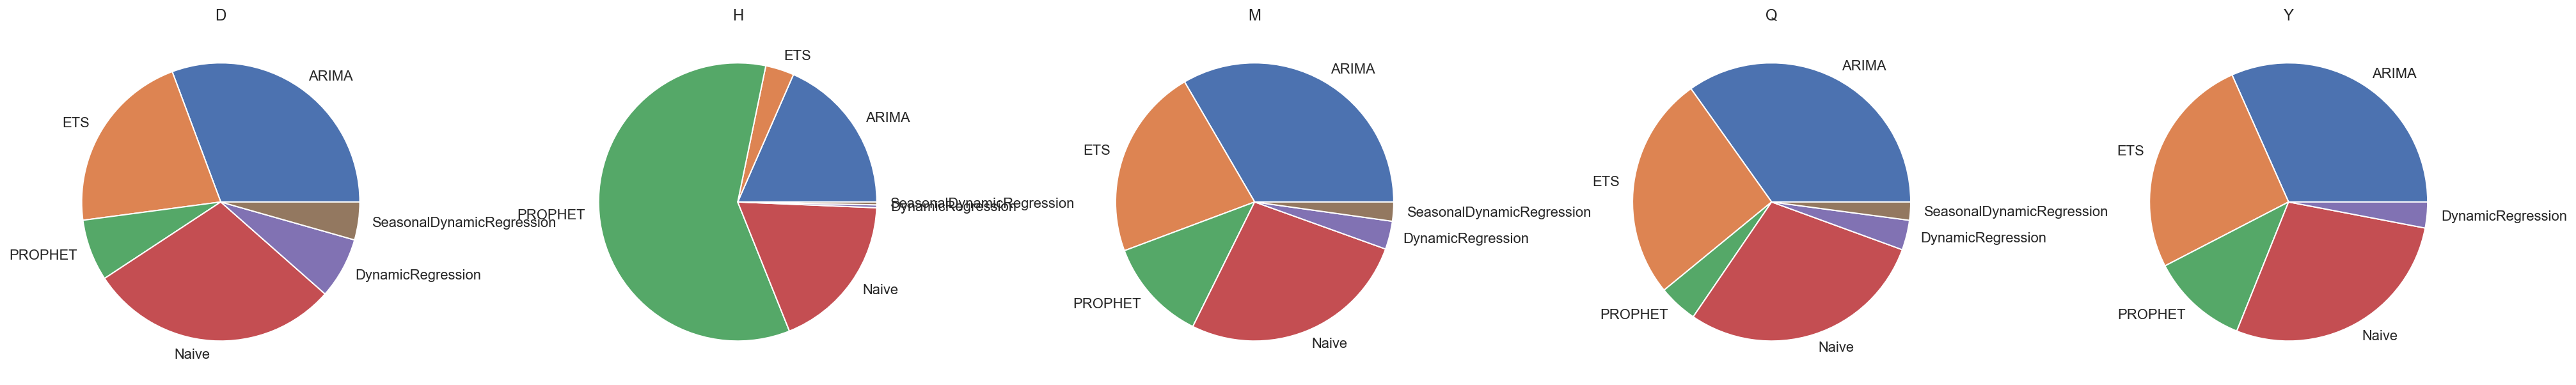

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(35, 5))
dataset = results[['periodicity', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('periodicity').mean()
for i, (periodicity, data) in enumerate(dataset.iterrows()):
    if periodicity == 'Y':
        data = data.drop('SeasonalDynamicRegression_wins_percent')
    axes[i].set_title(periodicity)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])

plt.show()

### Разбиение по категории

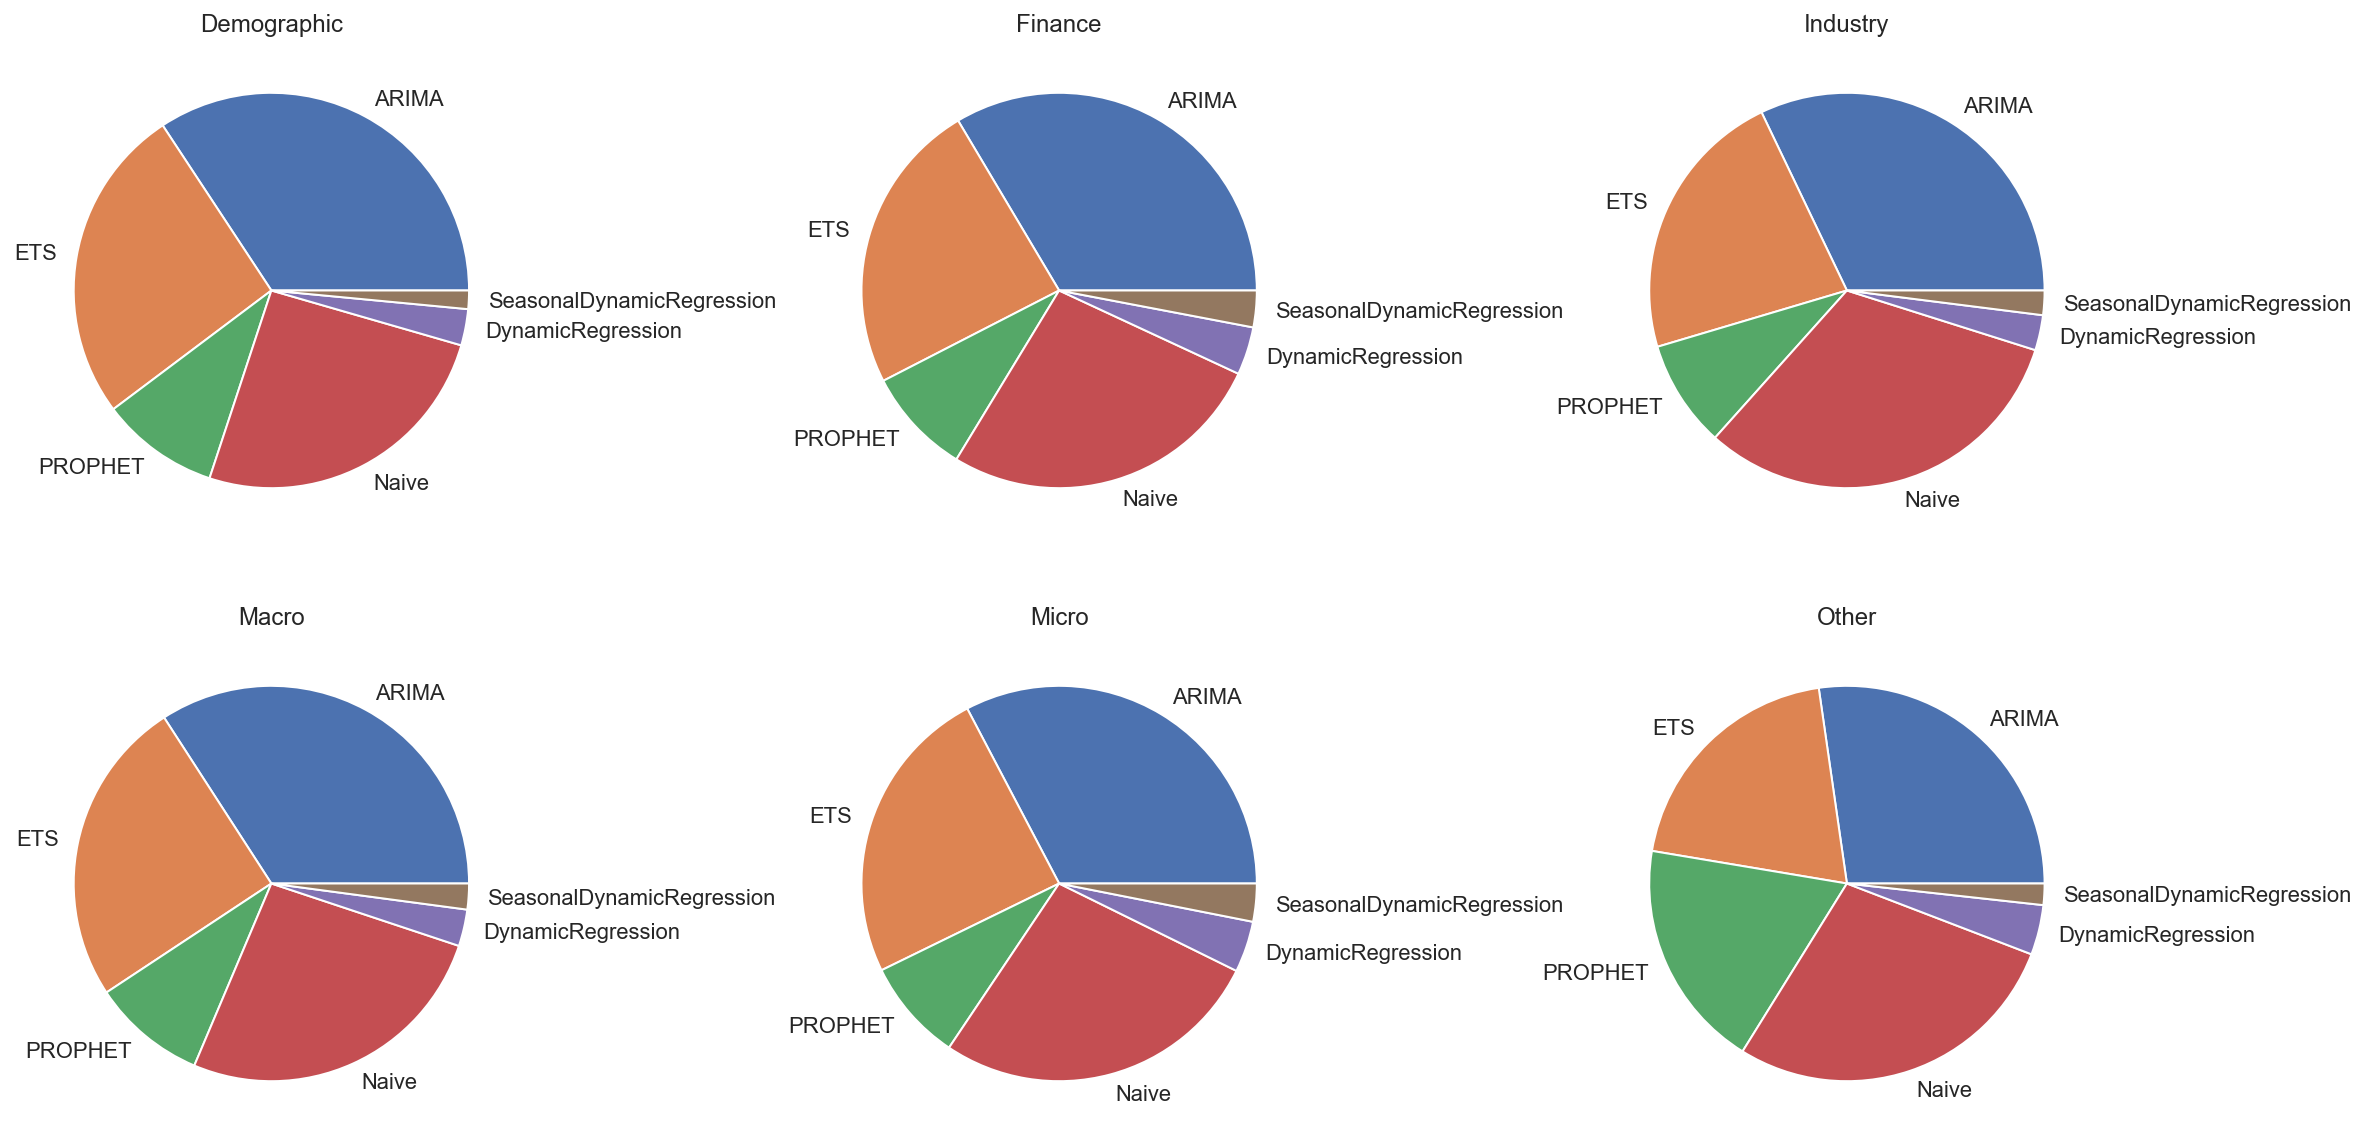

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = [*axes[0], *axes[1]]
dataset = results[['category', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('category').mean()
for i, (category, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(category)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])

plt.show()

### Разбиение по сезонности

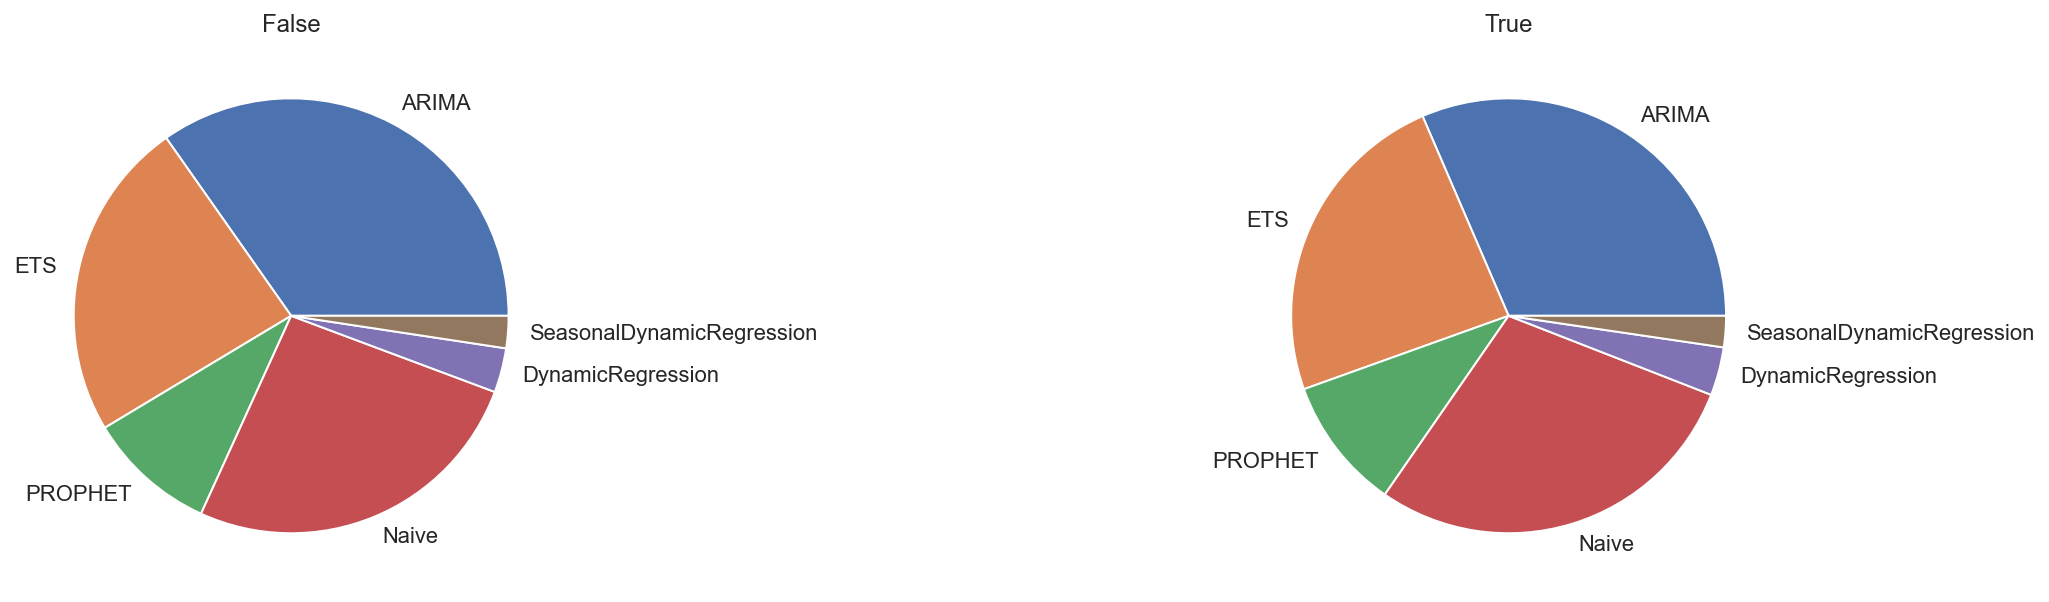

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
dataset = results[['is_seasonal', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('is_seasonal').mean()
for i, (is_seasonal, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(is_seasonal)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])

plt.show()

### Разбиение по стационарности

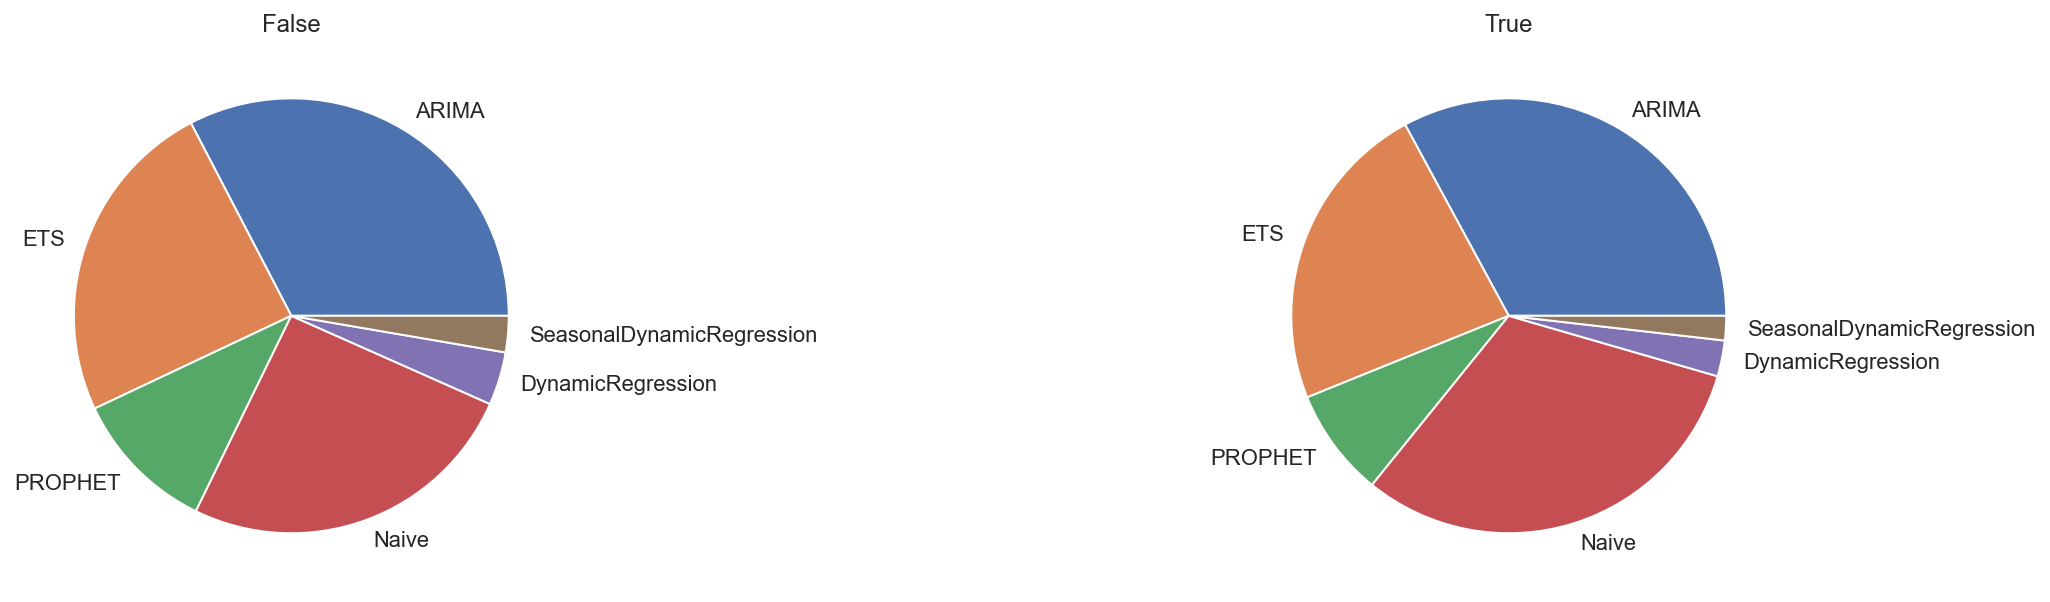

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
dataset = results[['is_stationary', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('is_stationary').mean()
for i, (is_stationary, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(is_stationary)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])

plt.show()

### Разбиение по горизонту прогнозирования

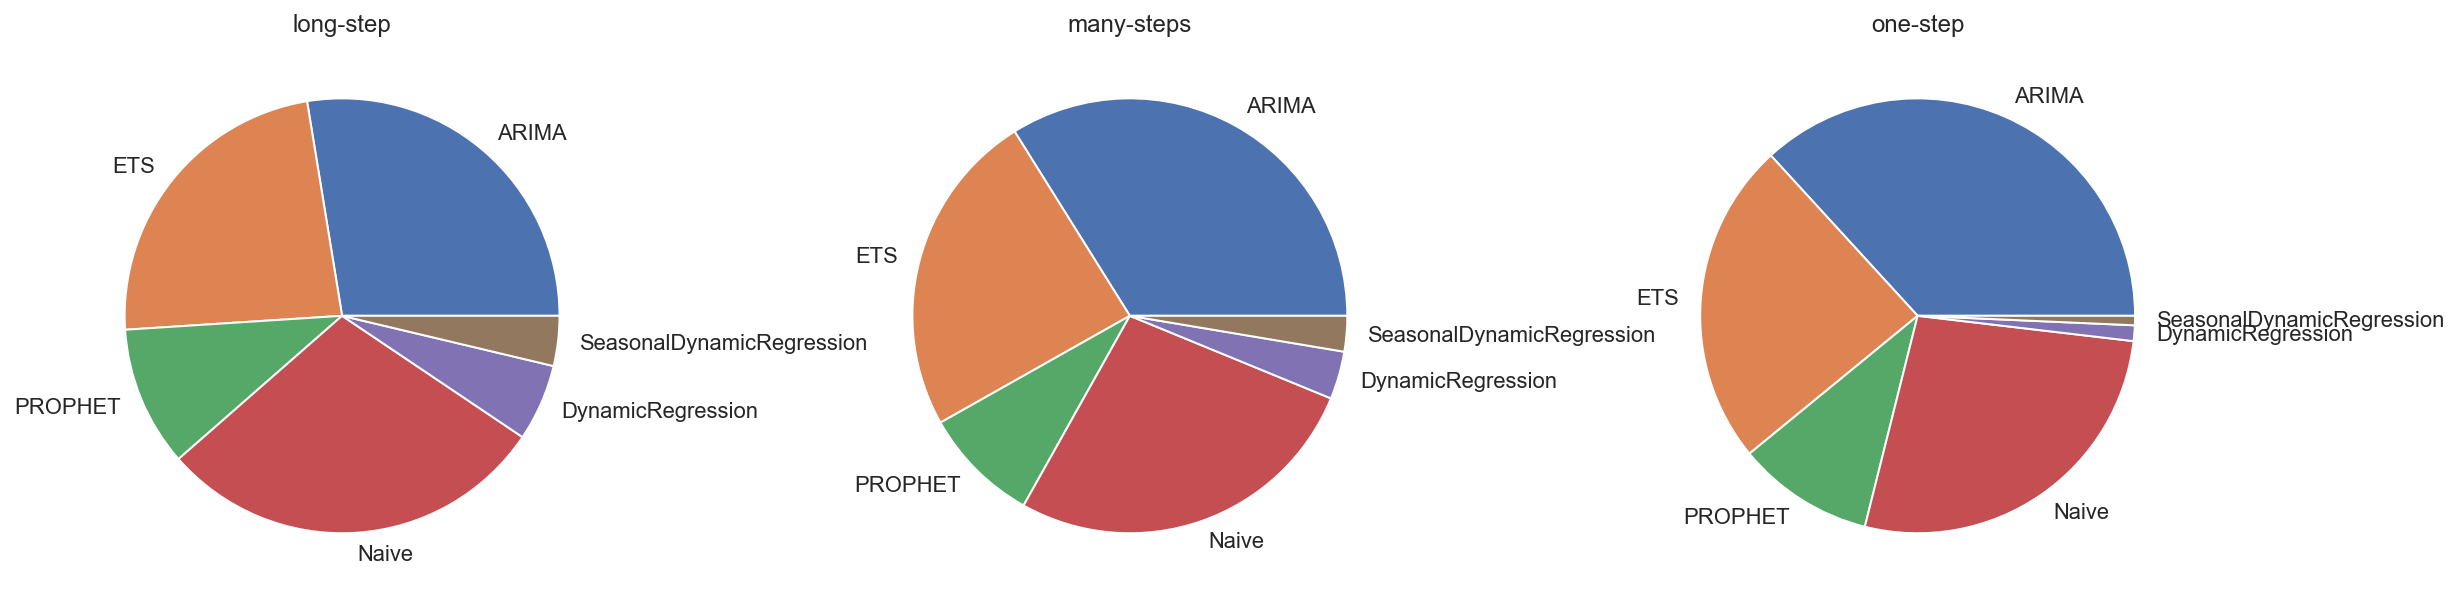

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
dataset = results[['fh', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('fh').mean()
for i, (fh, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(fh)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])

plt.show()